In [14]:
## IMport libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_excel
from pandas import read_csv
from numpy import percentile
import itertools
from matplotlib.backends.backend_pdf import PdfPages
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
from scipy import stats
from scipy.stats import norm
import statistics
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [40]:
df6=pd.read_csv('Sample_data_lihir.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
data7=df6.copy()

In [41]:
## Function for changing data type to numric
def NumericDtype(dataframe):
    columns1=list(dataframe)
    for i in columns1:
        dataframe[i]=pd.to_numeric(dataframe[i], errors='coerce')
        dataframe[i] = dataframe[i].dropna()
    return;

In [42]:
NumericDtype(data7)

In [43]:
data7.shape

(150, 70)

In [51]:
june=data7.loc['2019-04':'2019-06']

In [7]:
june.to_csv('GPJ.csv')

In [ ]:
def description(df):
    cols=df.columns
    records=[]
    missing_values=[]
    percentage_missing=[]
    zero_values=[]
    percentage_zeros=[]
    empty_values=[]
    percentage_empty=[]
    skewness_coeff=[]
    kurtosis_coeff=[]
    variance_value=[]
    median_value=[]
    outlier_num=[]
    outlier_percent=[]
    for i in cols:
        a=df[i].shape[0]
        records.append(a)
        b=df[i].isnull().sum()
        missing_values.append(b)
        percentage_of_missing_values=((b/a)*100)
        percentage_missing.append(percentage_of_missing_values)
        c=((df[i]==0).sum(axis=0))
        zero_values.append(c)
        percentage_of_zeros=((c/a)*100)
        percentage_zeros.append(percentage_of_zeros)
        d=((df[i]=='').sum(axis=0))
        empty_values.append(d)
        percentage_of_blanks=((d/a)*100)
        percentage_empty.append(percentage_of_blanks)
        skewness=df[i].skew()
        skewness_coeff.append(skewness)
        kurtosis=df[i].kurtosis()
        kurtosis_coeff.append(kurtosis)
        variance=df[i].var()
        variance_value.append(variance)
        median=df[i].median()
        median_value.append(median)
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        outlier=((df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))).sum()
        outlier_num.append(outlier)
        outliers_percentage=(outlier/a)*100
        outlier_percent.append(outliers_percentage)
    description_dictionary={'Total Records': records,
             'Missing Values': missing_values,
             'Missing Value %': percentage_missing,
             'Zero Values': zero_values,
             'Zero value Percentage': percentage_zeros,
             'Empty Cells': empty_values,
             'Empty Cells %':percentage_empty,
             'Skewness':skewness_coeff,
             'Kurtosis':kurtosis_coeff,
             'Variance':variance_value,
             'Median':median_value,
             'Outliers':outlier_num,
             'Outlier %':outlier_percent}
    description_df = pd.DataFrame(description_dictionary)
    x=df.describe()
    y=x.drop('count')
    z=y.transpose()
    w=z.reset_index(drop='True')
    t_cols=cols.transpose()
    list_dataframe=pd.DataFrame(t_cols,columns=['Label'])
    data_frames=[list_dataframe,description_df,w]
    final_df=pd.concat(data_frames, axis=1)
    final_df.to_csv('a.csv')
    return(final_df);

In [ ]:
description(a)

In [ ]:
def subplot(df):
    cols=df.columns
    pp = PdfPages('8_Variables_Plot.pdf')
    for i in cols:
        fig=plt.figure(i)
        #create subplots
        ax = plt.subplot2grid((2, 2), (0, 0))
        #creating the first plot
        # Fit a normal distribution to the data:
        mu, std = norm.fit(df[i].dropna().values)
        # Plot the histogram.
        ax.hist(df[i].dropna().values, bins=20, density=False, alpha=0.6, color='darkorange')
        ax.axvline(df[i].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
        ax.axvline(df[i].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
        title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
        ax.set_title(title,fontsize=15)
        ax.set_xlabel(str(i),fontsize=15)
        ax.set_ylabel('Count',fontsize=15)
        ax.legend(fontsize=15)
        #creating the second plot
        ax1 = plt.subplot2grid((2, 2), (0, 1))
        # Fit a normal distribution to the data:
        mu, std = norm.fit(df[i].dropna().values)
        #Plot the histogram
        ax1.hist(df[i].dropna().values, bins=20, density=True, alpha=0.6, color='aqua')
        ax1.axvline(df[i].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
        ax1.axvline(df[i].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
        # Plot the PDF.
        xmin, xmax = ax1.set_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        ax1.plot(x, p, 'k', linewidth=2)
        title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
        ax1.set_title(title,fontsize=15)
        ax1.set_xlabel(str(i),fontsize=15)
        ax1.set_ylabel('Density',fontsize=15)
        ax1.legend(fontsize=15)
        #creating the third plot
        ax2 = plt.subplot2grid((2, 2), (1, 0))
        # Fit a normal distribution to the data:
        mu, std = norm.fit(df[i].dropna().values)
        a=df[i].median()
        boxprops = dict(linestyle='-', linewidth=4, color='k')
        medianprops = dict(linestyle='-', linewidth=4, color='k')
        df.boxplot(column=i,ax=ax2,grid=True,vert=True,notch=True,showfliers=False, showmeans=True,
                boxprops=boxprops,
                medianprops=medianprops,patch_artist=True)
        title = "Fit results: median = %.2f,  mean= %.2f" % (a, mu)
        ax2.set_title(title,fontsize=15)
        ax2.legend(fontsize=15)
        #creating the fourth plot
        ax3 = plt.subplot2grid((2, 2), (1, 1))
        mu, std = norm.fit(df[i].dropna().values)
        description=df[i].describe()
        desc=description.drop('count')
        color_list = ['b', 'g', 'r', 'c','y','k','m']
        ax3 = desc.plot(kind='bar',legend=True, fontsize=15,color=color_list)
        title="Fit results: mean = %.2f,  std = %.2f" % (mu, std)
        ax3.set_title(title,fontsize=15)
        fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)
        pp.savefig(fig)
        plt.show()
    pp.close()

In [ ]:
subplot(data7)

In [ ]:
data7.columns

In [ ]:
c=data7[['FGO TK1551 Level Ctr PV - mm', 'FGO TK1552 Level Ctr PV - mm',
       'FGO TK1553 Level Ctr PV - mm', 'FGO TK1554 Level Ctr PV - mm',
       'FGO TK1555 Level Ctr PV - mm', 'TK1551 Air Blower Flow Loop PV - m3/h',
       'TK1552 Air Blower Flow Loop PV - m3/h',
       'TK1553 Air Blower Flow Loop PV - m3/h',
       'TK1554 Air Blower Flow Loop PV - m3/h',
       'TK1555 Air Blower Flow Loop PV - m3/h',
       'TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1553 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1554 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1555 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1551 Froth Bubble Diameter - mm',
       'TK1552 Froth Bubble Diameter - mm',
       'TK1553 Froth Bubble Diameter - mm', 'pH Indication for FGO - PV -  pH',
       'FGO FLTS FD TNK DNSTY CONTROL MEAS -  %(PS)',
       'Collector Added To TK1550 PV -  m3/h',
       'FGO FLTS FD TNK WTR FLW CONTROL MEAS -  m3/hr',
       'PAX Flow to TK1552/3 Controller PV -  L/H',
       'Total Promoter Flow to FGO Floats PV -  L/h',
       'FLOW Collector to FGO TK1550 PV -  L/Hr',
       'FROTHER  Flow 1 to TK1551/2 Controller PV -  L/H',
       'FROTHER  Flow 2 to TK1551/2 Controller PV -  L/H',
       'FROTHER  Flow to TK1551 Controller PV -  L/H',
       'PROMOTER  Flow Rate- PV -  G/T', '[OV] CYC Feed Press. Ctrl PV - kPag',
       'PU1011 Demand Speed Output - rpm', 'FGO CYCLONE Feed Density (%) - %',
       'FGO Cyclone Overflow Density (%) - %',
       'FGO CYCLONE O/F Sizing Control PV - % -150',
       '[OV] FGO Cyclone Overflow Density Control PV - %',
       'FGO Masspull (Cons/(Cons+Tails)) -  %',
       'FGO Masspull (Cons/Feed) -  %', 'FGO Masspull (Feed-Tails)/Feed -  %',
       'FGO Conc Flow Controller PV -  m3/hr',
       'FGO Tails Flow Controller PV -  m3/hr',
       'FLOTATION CONCENTRATE DENSITY -  %',
       'Flotation Concentrates Solids SG -  kg/m3',
       'FGO Flotation Rougher Tails Density  -  kg/m3',
       'GT #1 bed level control PV - %', 'GT #2 bed level control PV - %',
       'FLOW - m3/h', 'FLOW Collector to FGO Cyclone Under Flow - L/Hr',
       'FIT5380 FGO Additional Feed To HGO Flots Flow - m3/h',
       'Rougher to Float Flow Ctrl PV - m3/h', 'FLOATS R_Feed Density - kg/m3',
       'Rougher to Flotation Feed Density  - %',
       'Grinding Thickener 2 underflow  flow.CTRL PV - m3/h',
       'Grinding Thickener 1 underflow  flow.CTRL PV - m3/h',
       'TOTAL GT1 slurry feed GT1 TANK - T/H',
       'TOTAL GT1 flow rate FEED TANK - m3/H',
       'TOTAL GT2 slurry feed GT2 TANK - T/H',
       'TOTAL GT2 flow rate FEED TANK - m3/H',
       'TK2008 GT FEED MIX TANK LEVEL - %',
       'TK2011 GT FEED MIX TANK LEVEL - %',
       '[OV] FGO Sag Mill Feed Ctrl PV - t/h',
       '[OV] FGO Sag Mill Motor Power - kW', '[OV] FGO BM Motor Power - kW',
       '[OV] FGO SM Feed Dilution Flow  PV - m3/h', 'PREOX TK04 Level - %',
       'PREOX TK05 Level - %', 'PREOX TK06 Level - %',
       'TK1004 Underflow Flow loop PV - m3/h', 'TK1004 Level - %',
       'TK2004 Pre-Ox Tank Level - %', 'TK2005 Pre-Ox Tank Level - %']]

In [ ]:
corr1 = c.corr(method='pearson')

In [ ]:
corr1.head(1).transpose().to_csv('Pearson_Correlation_30_60_Range_data.csv')

In [ ]:
corr2=c.corr(method='spearman')

In [ ]:
corr2.head(1).transpose().to_csv('Spearman_Correlation_30_60_Range_Data.csv')

In [ ]:
data_week=data7.resample('W').mean()

In [ ]:
data_week.rename(index=lambda x: x.strftime('%U'),inplace=True)

In [ ]:
color_list = ['b','b','b','b','b','b','b','b','b','b','b','b','b',
              'g','g','g','g','g','g','g','g','g','g','g','g','g',
              'r','r','r','r','r','r','r','r','r','r','r','r','r',
              'c','c','c','c','c','c','c','c','c','c','c','c','c','b']
ax=data_week['FGO Mass Pull % PV - %'].plot(kind='bar',color=color_list)
ax.set(xlabel='Weeks', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(15)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=15)

In [ ]:
data_month=data7.resample('M').mean()

In [ ]:
data_month.rename(index=lambda x: x.strftime('%B'),inplace=True)

In [ ]:
data_month.head(20)

In [ ]:
color_list = ['b','b','b', 'g','g','g', 'r','r','r', 'c','c','c']
ax=data_month['FGO Mass Pull % PV - %'].plot(kind='bar',color=color_list)
ax.set(xlabel='Months', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(15)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=15)

In [ ]:
data_quarter=data7.resample('Q').mean()

In [ ]:
data_quarter.index.to_list()

In [ ]:
data_quarter.rename(index=lambda x: x.strftime('%B'),inplace=True)

In [ ]:
color_list = ['b', 'g', 'r', 'c','y','k','m']
ax=data_quarter['FGO Mass Pull % PV - %'].plot(kind='bar',color=color_list)
ax.set(xlabel='Quarter', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(15)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=15)

# Distribution

In [ ]:
mu=data_quarter['HGO FLOT MASS PULLRATE CNTRLLR - PV - %'].mean()

In [ ]:
std=data_quarter['HGO FLOT MASS PULLRATE CNTRLLR - PV - %'].std()

In [ ]:
minimum=data_quarter['HGO FLOT MASS PULLRATE CNTRLLR - PV - %'].min()

In [ ]:
maximum=data_quarter['HGO FLOT MASS PULLRATE CNTRLLR - PV - %'].max()

In [ ]:
#create subplots
ax = plt.subplot2grid((1, 2), (0, 0))
#creating the first plot
# Fit a normal distribution to the data:
mu, std = norm.fit(data7['FGO Mass Pull % PV - %'].dropna().values)
# Plot the histogram.
ax.hist(data7.loc['2019-04':'2019-06','FGO Mass Pull % PV - %'].dropna().values, bins=20, density=False, alpha=0.6, color='darkorange')
ax.axvline(data7['FGO Mass Pull % PV - %'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
ax.axvline(data7['FGO Mass Pull % PV - %'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
ax.set_title(title,fontsize=15)
ax.set_xlabel(str('FGO Mass Pull % PV - %'),fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.legend(fontsize=15)
#creating the second plot
ax1 = plt.subplot2grid((1, 2), (0, 1))
# Fit a normal distribution to the data:
mu, std = norm.fit(data7['FGO Mass Pull % PV - %'].dropna().values)
#Plot the histogram
ax1.hist(data7.loc['2019-04':'2019-06','FGO Mass Pull % PV - %'].dropna().values, bins=20, density=True, alpha=0.6, color='aqua')
ax1.axvline(data7['FGO Mass Pull % PV - %'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
ax1.axvline(data7['FGO Mass Pull % PV - %'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = ax1.set_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
ax1.set_title(title,fontsize=15)
ax1.set_xlabel(str('FGO Mass Pull % PV - %'),fontsize=15)
ax1.set_ylabel('Density',fontsize=15)
ax1.legend(fontsize=15)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)
plt.show()

In [ ]:
pos_corr=data7[['FGO Mass Pull % PV - %',
                'TK1552 Air Blower Flow Loop PV - m3/h',

'pH Indication for FGO - PV -  pH',
'Collector Added To TK1550 PV -  m3/h',
'PAX Flow to TK1552/3 Controller PV -  L/H',
'Total Promoter Flow to FGO Floats PV -  L/h',
'FLOW Collector to FGO TK1550 PV -  L/Hr',
'PROMOTER  Flow Rate- PV -  G/T',
'FGO CYCLONE Feed Density (%) - %',
'FGO Cyclone Overflow Density (%) - %',
'FGO CYCLONE O/F Sizing Control PV - % -150',
'[OV] FGO Cyclone Overflow Density Control PV - %',
'FLOTATION CONCENTRATE DENSITY -  %',
'FLOW Collector to FGO Cyclone Under Flow - L/Hr',
'Rougher to Flotation Feed Density  - %']]

In [ ]:
corr = pos_corr.corr(method='pearson')
ax = sns.heatmap(corr, annot = True,annot_kws={"size":12}, vmin=-1, vmax=1, 
                 center= 0, cmap= 'plasma', linewidths=3, linecolor='black',
                 square=True)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_xticklabels()+ax.get_yticklabels()):
    item.set_fontsize(16)
ax.tick_params(axis='both', which='minor', labelsize=15)

In [ ]:
c=t.corr()

In [ ]:
t=data7[['FGO Mass Pull % PV - %',]]

In [ ]:
c[:1].to_csv('Correlation1.csv')

In [ ]:
c=data7[['FGO Mass Pull % PV - %',
'FLOW Collector to FGO TK1550 PV -  L/Hr',
'FROTHER  Flow 2 to TK1551/2 Controller PV -  L/H',
'FLOW Collector to FGO Cyclone Under Flow - L/Hr',
'Total Promoter Flow to FGO Floats PV -  L/h',
'FGO CYCLONE O/F Sizing Control PV - % -150',
'FGO TK1555 Level Ctr PV - mm',
'TK1554 VELOCITY TO AIR CTRL PV - mm/s',
'TK1553 VELOCITY TO AIR CTRL PV - mm/s',
'[OV] FGO SM Feed Dilution Flow  PV - m3/h',
'TOTAL GT1 slurry feed GT1 TANK - T/H',
'Rougher to Flotation Feed Density  - %',
'FLOATS R_Feed Density - kg/m3'
]]

In [ ]:
class StatsModelsSettings():
    """
    This class contains settings for the statsmodels package, settings include,
    * exponent:int - when equal to one this is a straight line, when >1 this is a curve
    * confidence:boolean - specifies whether confidence lines should be calculated and plotted
    """
    exponent = 1
    confidence = False

    def __init__(self, exponent=1, confidence=False):
        """
        This initialization method constructs a new StatsModelSettings object
        """
        self.exponent = exponent
        self.confidence = confidence
        pass


In [ ]:
def run_ordinary_least_squares(ols_dates, ols_data, statsmodels_settings):
        """
        This method receives the dates and prices of a Quandl data-set as well as settings for the StatsModels package,
        it then calculates the regression lines and / or the confidence lines are returns the objects
        """
        intercept = np.column_stack((ols_dates, ols_dates ** statsmodels_settings.exponent))
        constant = sm.add_constant(intercept)
        statsmodel_regression = sm.OLS(ols_prices, constant).fit()
        print(statsmodel_regression.summary())
        if statsmodels_settings.confidence:
            prstd, lower, upper = wls_prediction_std(statsmodel_regression)
            return statsmodel_regression, lower, upper
        else:
            return statsmodel_regression


In [ ]:
data7.columns

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
y=data7['FGO Mass Pull % PV - %']

In [ ]:
y.head()

In [ ]:
data7=data7.drop('FGO Mass Pull % PV - %',inplace=True,axis=1)

In [ ]:
data7.shape

In [ ]:
X=data7

In [ ]:
c.head()

In [ ]:
model = sm.OLS(y, c)
results = model.fit()
print(results.summary())

In [ ]:
c.corr().transpose().to_csv('Important_Correlation.csv')

In [ ]:
c.head()

In [ ]:
c.to_csv('D3.csv')

In [ ]:
a=data7[['FGO Mass Pull % PV - %',
'FLOW Collector to FGO TK1550 PV -  L/Hr',
'FROTHER  Flow 2 to TK1551/2 Controller PV -  L/H',
'FGO CYCLONE O/F Sizing Control PV - % -150',
'FGO TK1555 Level Ctr PV - mm',
'[OV] FGO SM Feed Dilution Flow  PV - m3/h',
'TOTAL GT1 slurry feed GT1 TANK - T/H',
'Rougher to Flotation Feed Density  - %',
'FLOATS R_Feed Density - kg/m3']]

In [ ]:
a.corr().head(1).transpose().to_csv('CH.csv')

In [ ]:
data7.

In [29]:
a=data7[['FGO TK1551 Level Ctr PV - mm', 'FGO TK1552 Level Ctr PV - mm',
       'FGO TK1553 Level Ctr PV - mm', 'FGO TK1554 Level Ctr PV - mm',
       'FGO TK1555 Level Ctr PV - mm']]

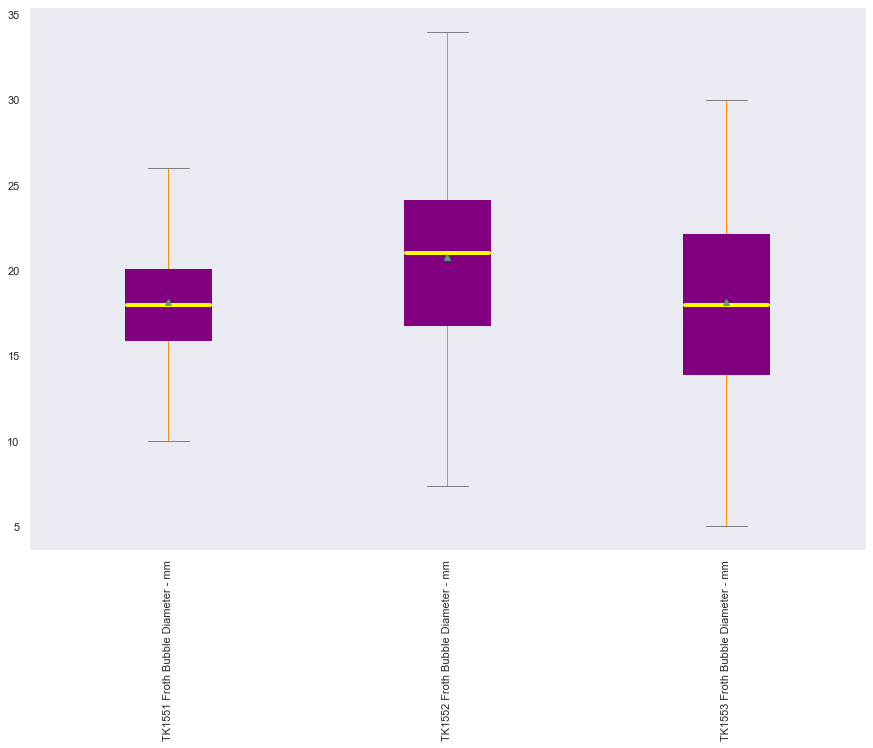

In [36]:
props = dict(boxes="Purple", whiskers="DarkOrange", medians="Yellow", caps="Gray")
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')
d.plot.box(patch_artist=True,color=props, grid = False,showfliers=False, showmeans=True,boxprops=boxprops,
                medianprops=medianprops,rot=90)

In [31]:
b=data7[['TK1551 Air Blower Flow Loop PV - m3/h',
       'TK1552 Air Blower Flow Loop PV - m3/h',
       'TK1553 Air Blower Flow Loop PV - m3/h',
       'TK1554 Air Blower Flow Loop PV - m3/h',
       'TK1555 Air Blower Flow Loop PV - m3/h',]]

In [33]:
c=data7[['TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1553 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1554 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1555 VELOCITY TO AIR CTRL PV - mm/s']]

In [35]:
d=data7[['TK1551 Froth Bubble Diameter - mm',
       'TK1552 Froth Bubble Diameter - mm',
       'TK1553 Froth Bubble Diameter - mm']]

In [52]:
e=june[['FGO TK1552 Level Ctr PV - mm','TK1552 Air Blower Flow Loop PV - m3/h','TK1552 VELOCITY TO AIR CTRL PV - mm/s','TK1552 Froth Bubble Diameter - mm']]

In [53]:
f=e.resample('M').mean()

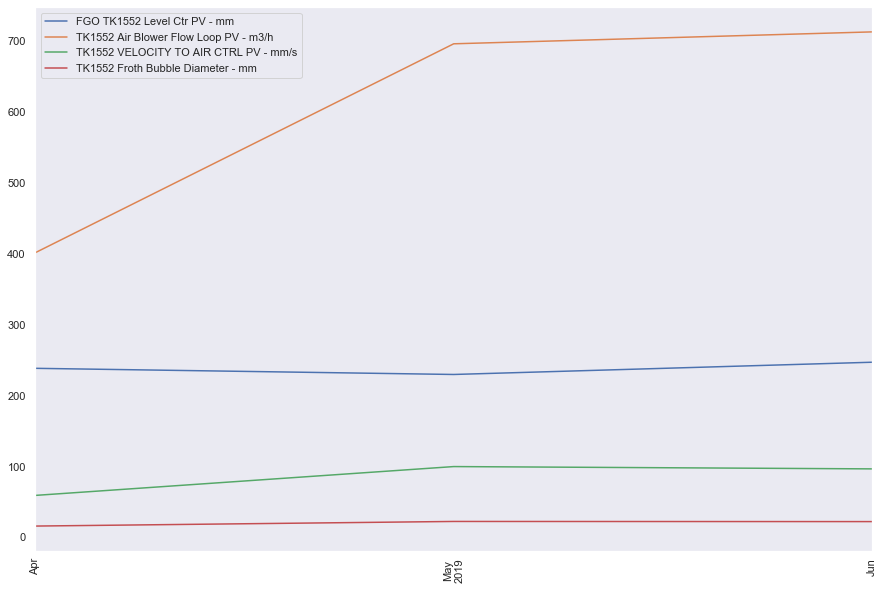

In [54]:
line=f.plot(kind='line', grid = False,rot=90)